## Advanced ML

A drug company would like to introduce a drug to reduce acid indigestion. It is desirable to estimate $θ$, the proportion of the market share that this drug will capture. The company interviews n people and Y of them say that they will buy the drug. 

If in the past new drugs tend to capture a proportion between say .05 and .15 of the market, and if all values in between are assumed equally likely, then $θ ∼ Unif(.05, .15)$

In [1]:
import pymc3 as pm

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
c:\apps\anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]
Sampling 4 chains, 0 divergences: 100%|██████████████████████████████████████| 42000/42000 [01:27<00:00, 477.58draws/s]
The acceptance probability does not match the target. It is 0.8807503061384311, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8845072766780225, but should be close to 0.8. Try to increase the number of tuning steps.


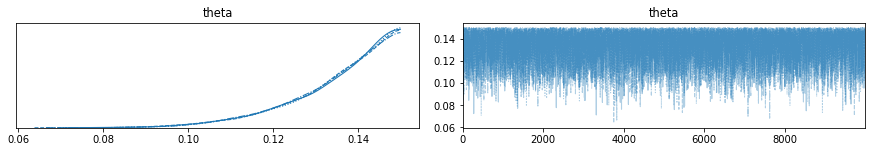

In [2]:
with pm.Model() as model:
    
    # Priors for unknown model parameters
    theta = pm.Uniform(name="theta", lower=0.05, upper=0.15)
    
    # Likelihood
    x = pm.Binomial(name="x", p=theta,n=100,observed=20)

    # Posterior
    # draw 10000 posterior samples
    trace = pm.sample(draws=10000, tune=500)
    
    pm.traceplot(trace)

Above plot shows a simulation from the posterior distribution of theta